## T1

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [34]:
path='SALE2021.csv'
dataframe=pd.read_csv(path)
dataframe


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,1,iPhone,1,700.00,01/22/20 21:25,An Giang
1,2,Lightning Charging Cable,1,14.95,01/28/20 14:15,Vung Tau
2,3,Wired Headphones,2,11.99,01/17/20 13:33,Bac Giang
3,4,27in FHD Monitor,1,149.99,01/05/20 20:33,Bac Kan
4,5,Wired Headphones,1,11.99,01/25/20 11:59,Bac Lieu
...,...,...,...,...,...,...
739,740,Macbook Pro Laptop,1,1700.00,12/25/20 9:51,Ha Giang
740,741,Lightning Charging Cable,1,14.95,12/27/20 17:25,Ha Nam
741,742,27in FHD Monitor,1,149.99,12/24/20 18:51,Ha Noi
742,743,AA Batteries (4-pack),1,3.84,12/17/20 22:52,Ha Tinh


In [35]:
df=dataframe
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,1,iPhone,1,700.00,01/22/20 21:25,An Giang,01
1,2,Lightning Charging Cable,1,14.95,01/28/20 14:15,Vung Tau,01
2,3,Wired Headphones,2,11.99,01/17/20 13:33,Bac Giang,01
3,4,27in FHD Monitor,1,149.99,01/05/20 20:33,Bac Kan,01
4,5,Wired Headphones,1,11.99,01/25/20 11:59,Bac Lieu,01


In [36]:
df['Order Date'].str[0:2]

0      01
1      01
2      01
3      01
4      01
       ..
739    12
740    12
741    12
742    12
743    12
Name: Order Date, Length: 744, dtype: object

In [57]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [56]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

In [63]:
df['Sale']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,1,iPhone,1,700.000000,700.000000,01/22/20 21:25,An Giang,01
1,2,Lightning Charging Cable,1,14.950000,14.950000,01/28/20 14:15,Vung Tau,01
2,3,Wired Headphones,2,11.990000,23.980000,01/17/20 13:33,Bac Giang,01
3,4,27in FHD Monitor,1,149.990005,149.990005,01/05/20 20:33,Bac Kan,01
4,5,Wired Headphones,1,11.990000,11.990000,01/25/20 11:59,Bac Lieu,01


In [62]:
df['Quantity Ordered']*df['Price Each']

0       700.000000
1        14.950000
2        23.980000
3       149.990005
4        11.990000
          ...     
739    1700.000000
740      14.950000
741     149.990005
742       3.840000
743     379.989990
Length: 744, dtype: float32

In [59]:
moving_colum=df.pop('Sale')
df.insert(4,'Sale', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,1,iPhone,1,700.000000,700.000000,01/22/20 21:25,An Giang,01
1,2,Lightning Charging Cable,1,14.950000,14.950000,01/28/20 14:15,Vung Tau,01
2,3,Wired Headphones,2,11.990000,23.980000,01/17/20 13:33,Bac Giang,01
3,4,27in FHD Monitor,1,149.990005,149.990005,01/05/20 20:33,Bac Kan,01
4,5,Wired Headphones,1,11.990000,11.990000,01/25/20 11:59,Bac Lieu,01


In [64]:
df.groupby('Month').sum()['Sale']

Month
01    10157.879883
02    13597.650391
03    11216.509766
04    10252.150391
05    10138.000000
06    12989.700195
07     9920.110352
08    15701.330078
09    12253.179688
10     9238.530273
11    10209.530273
12    12633.280273
Name: Sale, dtype: float32

In [66]:
sales_value=df.groupby('Month').sum()['Sale']
sales_value.max()

15701.330078125

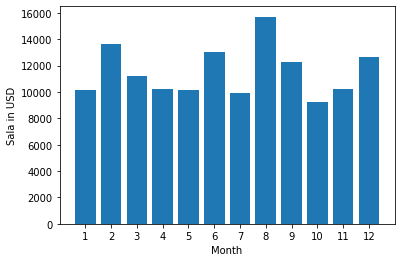

In [68]:
Month=range(1,13)
plt.bar(x=Month, height=sales_value)
plt.xticks(Month)
plt.xlabel('Month')
plt.ylabel('Sala in USD')
plt.show()